# Python Statistics Essential Training

## Exploring & Visualizing

### 02_01 - Categorical Exploration

Goals:

* Explore a categorical column, such as "MS Zoning," by accessing the column and displaying its unique values.
* Visualize the value counts of a categorical column using a bar chart.
* Visualize the value counts of a categorical column using a horizontal bar chart.

In [4]:
import pandas as pd
url = 'https://github.com/mattharrison/datasets/raw/master/data/ames-housing-dataset.zip'
raw = pd.read_csv(url, engine='pyarrow', dtype_backend='pyarrow')

# make function
def shrink_ints(df):
    mapping = {}
    for col in df.dtypes[df.dtypes=='int64[pyarrow]'].index:
        max_ = df[col].max()
        min_ = df[col].min()
        if min_ < 0:
            continue
        if max_ < 255:
            mapping[col] = 'uint8[pyarrow]'
        elif max_ < 65_535:
            mapping[col] = 'uint16[pyarrow]'
        elif max_ <  4294967295:
            mapping[col] = 'uint32[pyarrow]'
    return df.astype(mapping)


def clean_housing(df):
    return (df
     .assign(**df.select_dtypes('string').replace('', 'Missing').astype('category'),
             **{'Garage Yr Blt': df['Garage Yr Blt'].clip(upper=df['Year Built'].max())})
     .pipe(shrink_ints)
    )    

housing = clean_housing(raw)

In [5]:
housing.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.0,2930.0,2930.0,2440.0,2930.0,2930.0,2930.0,2930.0,2930.0,2907.0,...,2930.0,2930.0,2930.0,2930.0,2930.0,2930.0,2930.0,2930.0,2930.0,2930.0
mean,1465.5,714464496.988737,57.387372,69.22459,10147.921843,6.094881,5.56314,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,188730844.64939,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.4834,64.139059,25.141331,56.08737,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.0,526301100.0,20.0,21.0,1300.0,1.0,1.0,1872.0,1950.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2006.0,12789.0
25%,733.25,528477022.5,20.0,58.0,7440.25,5.0,5.0,1954.0,1965.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2007.0,129500.0
50%,1465.5,535453620.0,50.0,68.0,9436.5,6.0,5.0,1973.0,1993.0,0.0,...,0.0,27.0,0.0,0.0,0.0,0.0,0.0,6.0,2008.0,160000.0
75%,2197.75,907181097.5,70.0,80.0,11555.25,7.0,6.0,2001.0,2004.0,164.0,...,168.0,70.0,0.0,0.0,0.0,0.0,0.0,8.0,2009.0,213500.0
max,2930.0,1007100110.0,190.0,313.0,215245.0,10.0,9.0,2010.0,2010.0,1600.0,...,1424.0,742.0,1012.0,508.0,576.0,800.0,17000.0,12.0,2010.0,755000.0


In [6]:
# categoricals
(housing
  ['MS Zoning'])

0       RL
1       RH
2       RL
3       RL
4       RL
        ..
2925    RL
2926    RL
2927    RL
2928    RL
2929    RL
Name: MS Zoning, Length: 2930, dtype: category
Categories (7, string[pyarrow]): [A (agr), C (all), FV, I (all), RH, RL, RM]

In [7]:
# Display the counts of unique values in the 'MS Zoning' categorical column
(housing
  ['MS Zoning']             # Select the 'MS Zoning' column
  .value_counts()           # Count the occurrences of each unique value in the 'MS Zoning' column
)

MS Zoning
RL         2273
RM          462
FV          139
RH           27
C (all)      25
A (agr)       2
I (all)       2
Name: count, dtype: int64

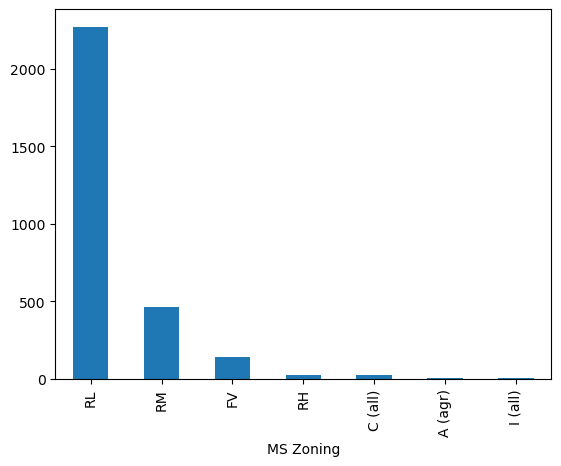

In [8]:
# Display the counts of unique values in the 'MS Zoning' categorical column and plot them as a bar chart
(housing
  ['MS Zoning']             # Select the 'MS Zoning' column
  .value_counts()           # Count the occurrences of each unique value in the 'MS Zoning' column
  .plot.bar());             # Plot the counts as a bar chart

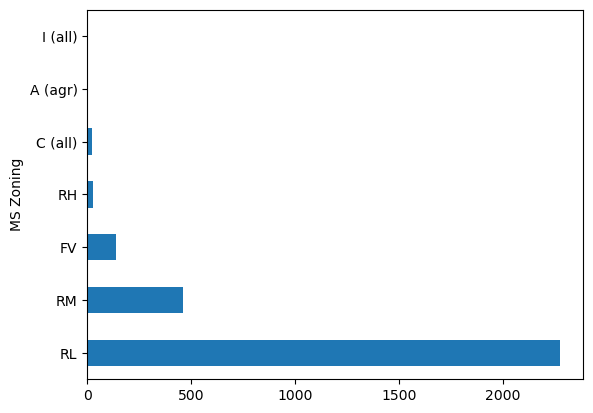

In [9]:
# Display the counts of unique values in the 'MS Zoning' categorical column and plot them as a horizontal bar chart
(housing
  ['MS Zoning']             # Select the 'MS Zoning' column
  .value_counts()           # Count the occurrences of each unique value in the 'MS Zoning' column
  .plot.barh());            # Plot the counts as a horizontal bar chart

### 02_02: Histograms and Distributions

Goals:

* Obtain descriptive statistics of the "SalePrice" column using the `.describe` method.
* Visualize the distribution of the "SalePrice" column using a histogram.
* Customize the histogram by specifying the number of bins using the `bins` parameter.

In [11]:
# Display descriptive statistics for the 'SalePrice' column, which is numerical
(housing
 .SalePrice               # Select the 'SalePrice' column
 .describe()              # Generate descriptive statistics (count, mean, std, min, 25%, 50%, 75%, max)
)

count           2930.0
mean     180796.060068
std       79886.692357
min            12789.0
25%           129500.0
50%           160000.0
75%           213500.0
max           755000.0
Name: SalePrice, dtype: double[pyarrow]

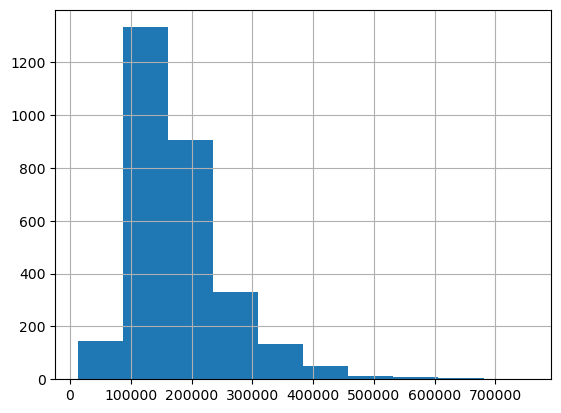

In [12]:
# Plot a histogram of the 'SalePrice' column to visualize its distribution
(housing
 .SalePrice               # Select the 'SalePrice' column
 .hist()                  # Plot a histogram of the 'SalePrice' values (standard bins = 10)
);

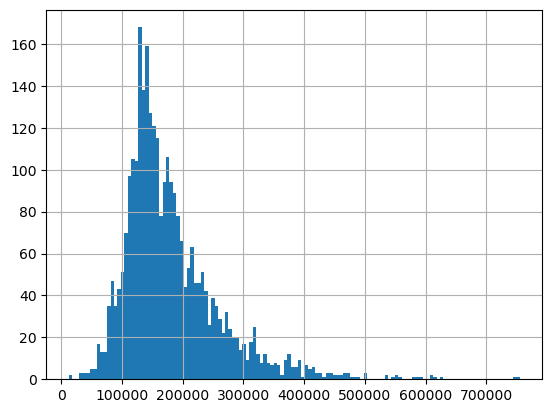

In [13]:
# Plot a histogram of the 'SalePrice' column with 130 bins to visualize its distribution in more detail
(housing
 .SalePrice               # Select the 'SalePrice' column
 .hist(bins=130)          # Plot a histogram with 130 bins for a more detailed view of the distribution
);

### 02_03 - Outliers and Z-scores

Goals:

* Calculate the Z-score for the "SalePrice" column using the `calc_z` function.
* Identify outliers based on the Z-score by assigning a boolean column indicating whether the Z-score is greater than or equal to 3 or less than or equal to -3.
* Identify outliers using the IQR (interquartile range) method by assigning a boolean column indicating whether the values are outside the range of median ± 3 * IQR.


In [15]:
# Calculate the Z-score for the 'SalePrice' column to identify outliers
def calc_z(df, col):
    mean = df[col].mean()          # Calculate the mean of the specified column
    std = df[col].std()            # Calculate the standard deviation of the specified column
    return (df[col] - mean) / std  # Compute the Z-score for each value in the column

(housing
 .pipe(calc_z, col='SalePrice')    # Apply the calc_z function to the 'SalePrice' column using the pipe method
)

0       0.428156
1      -0.948795
2      -0.110107
3        0.79117
4       0.113961
          ...   
2925    -0.47938
2926   -0.623334
2927   -0.610816
2928   -0.135142
2929    0.090177
Name: SalePrice, Length: 2930, dtype: double[pyarrow]

In [16]:
############## Beautiful #########################
(housing
 .assign(z_score=calc_z(housing, col='SalePrice'))  # Calculate Z-scores and assign them to a new column 'z_score'
)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,z_score
0,1,526301100,20,RL,141,31770,Pave,<NA>,IR1,Lvl,...,<NA>,<NA>,<NA>,0,5,2010,WD,Normal,215000,0.428156
1,2,526350040,20,RH,80,11622,Pave,<NA>,Reg,Lvl,...,<NA>,MnPrv,<NA>,0,6,2010,WD,Normal,105000,-0.948795
2,3,526351010,20,RL,81,14267,Pave,<NA>,IR1,Lvl,...,<NA>,<NA>,Gar2,12500,6,2010,WD,Normal,172000,-0.110107
3,4,526353030,20,RL,93,11160,Pave,<NA>,Reg,Lvl,...,<NA>,<NA>,<NA>,0,4,2010,WD,Normal,244000,0.79117
4,5,527105010,60,RL,74,13830,Pave,<NA>,IR1,Lvl,...,<NA>,MnPrv,<NA>,0,3,2010,WD,Normal,189900,0.113961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37,7937,Pave,<NA>,IR1,Lvl,...,<NA>,GdPrv,<NA>,0,3,2006,WD,Normal,142500,-0.47938
2926,2927,923276100,20,RL,<NA>,8885,Pave,<NA>,IR1,Low,...,<NA>,MnPrv,<NA>,0,6,2006,WD,Normal,131000,-0.623334
2927,2928,923400125,85,RL,62,10441,Pave,<NA>,Reg,Lvl,...,<NA>,MnPrv,Shed,700,7,2006,WD,Normal,132000,-0.610816
2928,2929,924100070,20,RL,77,10010,Pave,<NA>,Reg,Lvl,...,<NA>,<NA>,<NA>,0,4,2006,WD,Normal,170000,-0.135142


In [17]:
(housing
 .assign(z_score=calc_z(housing, col='SalePrice'))  # Calculate Z-scores and assign them to a new column 'z_score'
 .query('z_score <= -3', engine='python')           # Filter rows where the Z-score is less than or equal to -3 using the 'python' engine
)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,z_score


In [18]:
# Function to identify outliers in a column based on the Interquartile Range (IQR)
def calc_iqr_outlier(df, col):
    ser = df[col]                                # Select the series (column) from the DataFrame
    iqr = ser.quantile(.75) - ser.quantile(.25)  # Calculate the IQR (Q3 - Q1)
    med = ser.median()                           # Calculate the median of the series
    small_mask = ser < med - iqr * 3  # Identify values significantly smaller than the median (below median - 3*IQR)
    large_mask = ser > med + iqr * 3  # Identify values significantly larger than the median (above median + 3*IQR)
    return small_mask | large_mask    # Return a mask that is True for all outliers

# Apply the IQR outlier detection to the 'SalePrice' column and filter the DataFrame to show only the outliers
housing[
    calc_iqr_outlier(housing, 'SalePrice')       # Use the calc_iqr_outlier function to get a mask for outliers in 'SalePrice'
]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
15,16,527216070,60,RL,47,53504,Pave,<NA>,IR2,HLS,...,0,<NA>,<NA>,<NA>,0,6,2010,WD,Normal,538000
44,45,528150070,20,RL,100,12919,Pave,<NA>,IR1,Lvl,...,0,<NA>,<NA>,<NA>,0,3,2010,New,Partial,611657
46,47,528176010,20,RL,110,14300,Pave,<NA>,Reg,HLS,...,0,<NA>,<NA>,<NA>,0,6,2010,WD,Normal,500000
366,367,527214050,20,RL,63,17423,Pave,<NA>,IR1,Lvl,...,0,<NA>,<NA>,<NA>,0,7,2009,New,Partial,501837
421,422,528102140,60,RL,110,14257,Pave,<NA>,Reg,Lvl,...,0,<NA>,<NA>,<NA>,0,6,2009,WD,Normal,462000
422,423,528104070,60,RL,104,13518,Pave,<NA>,Reg,Lvl,...,0,<NA>,<NA>,<NA>,0,7,2009,New,Partial,485000
423,424,528106020,20,RL,105,15431,Pave,<NA>,Reg,Lvl,...,0,<NA>,<NA>,<NA>,0,4,2009,WD,Normal,555000
431,432,528110010,60,RL,97,13478,Pave,<NA>,IR1,Lvl,...,0,<NA>,<NA>,<NA>,0,6,2009,ConLI,Normal,451950
432,433,528110020,20,RL,105,13693,Pave,<NA>,Reg,Lvl,...,0,<NA>,<NA>,<NA>,0,3,2009,WD,Normal,610000
433,434,528110090,60,RL,107,13891,Pave,<NA>,Reg,Lvl,...,0,<NA>,<NA>,<NA>,0,1,2009,New,Partial,582933


In [19]:
# Create a column 'iqr_outlier' wich say True if the value in 'SalePrice' is an outlier 

def calc_iqr_outlier(df, col):
    ser = df[col]                                # Select the series (column) from the DataFrame
    iqr = ser.quantile(.75) - ser.quantile(.25)  # Calculate the IQR (Q3 - Q1)
    med = ser.median()                           # Calculate the median of the series
    small_mask = ser < med - iqr * 3             # Identify values significantly smaller than the median (below median - 3*IQR)
    large_mask = ser > med + iqr * 3             # Identify values significantly larger than the median (above median + 3*IQR)
    return small_mask | large_mask               # Return a mask that is True for all outliers

(housing
 .assign(iqr_outlier=calc_iqr_outlier(housing, col='SalePrice'))  # Add a column 'iqr_outlier' to indicate outliers
 .query('iqr_outlier', engine='python')  # Filter the DataFrame to show only rows where 'iqr_outlier' is True, using the 'python' engine
)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,iqr_outlier
15,16,527216070,60,RL,47,53504,Pave,<NA>,IR2,HLS,...,<NA>,<NA>,<NA>,0,6,2010,WD,Normal,538000,True
44,45,528150070,20,RL,100,12919,Pave,<NA>,IR1,Lvl,...,<NA>,<NA>,<NA>,0,3,2010,New,Partial,611657,True
46,47,528176010,20,RL,110,14300,Pave,<NA>,Reg,HLS,...,<NA>,<NA>,<NA>,0,6,2010,WD,Normal,500000,True
366,367,527214050,20,RL,63,17423,Pave,<NA>,IR1,Lvl,...,<NA>,<NA>,<NA>,0,7,2009,New,Partial,501837,True
421,422,528102140,60,RL,110,14257,Pave,<NA>,Reg,Lvl,...,<NA>,<NA>,<NA>,0,6,2009,WD,Normal,462000,True
422,423,528104070,60,RL,104,13518,Pave,<NA>,Reg,Lvl,...,<NA>,<NA>,<NA>,0,7,2009,New,Partial,485000,True
423,424,528106020,20,RL,105,15431,Pave,<NA>,Reg,Lvl,...,<NA>,<NA>,<NA>,0,4,2009,WD,Normal,555000,True
431,432,528110010,60,RL,97,13478,Pave,<NA>,IR1,Lvl,...,<NA>,<NA>,<NA>,0,6,2009,ConLI,Normal,451950,True
432,433,528110020,20,RL,105,13693,Pave,<NA>,Reg,Lvl,...,<NA>,<NA>,<NA>,0,3,2009,WD,Normal,610000,True
433,434,528110090,60,RL,107,13891,Pave,<NA>,Reg,Lvl,...,<NA>,<NA>,<NA>,0,1,2009,New,Partial,582933,True


### 02_04 - Correlations

Goals:

* Calculate the Pearson correlation
* Calculate the Spearman correlation 
* Color a correlation matrix appropriately

In [21]:
# Calculate Pearson correlation only on the numeric columns of the housing DataFrame
housing.select_dtypes(include='number').corr()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Order,1.000000,0.173593,0.011797,-0.007034,0.031354,-0.048500,-0.011054,-0.052319,-0.075566,-0.030907,...,-0.011292,0.016355,0.027908,-0.024975,0.004307,0.052518,-0.006083,0.133365,-0.975993,-0.031408
PID,0.173593,1.000000,-0.001281,-0.096918,0.034868,-0.263147,0.104451,-0.343388,-0.157111,-0.229283,...,-0.051135,-0.071311,0.162519,-0.024894,-0.025735,-0.002845,-0.008260,-0.050455,0.009579,-0.246521
MS SubClass,0.011797,-0.001281,1.000000,-0.420135,-0.204613,0.039419,-0.067349,0.036579,0.043397,0.002730,...,-0.017310,-0.014823,-0.022866,-0.037956,-0.050614,-0.003434,-0.029254,0.000350,-0.017905,-0.085092
Lot Frontage,-0.007034,-0.096918,-0.420135,1.000000,0.491313,0.212042,-0.074448,0.121562,0.091712,0.222407,...,0.120084,0.163040,0.012758,0.028564,0.076666,0.173947,0.044476,0.011085,-0.007547,0.357318
Lot Area,0.031354,0.034868,-0.204613,0.491313,1.000000,0.097188,-0.034759,0.023258,0.021682,0.126830,...,0.157212,0.103760,0.021868,0.016243,0.055044,0.093775,0.069188,0.003859,-0.023085,0.266549
Overall Qual,-0.048500,-0.263147,0.039419,0.212042,0.097188,1.000000,-0.094812,0.597027,0.569609,0.429418,...,0.255663,0.298412,-0.140332,0.018240,0.041615,0.030399,0.005179,0.031103,-0.020719,0.799262
Overall Cond,-0.011054,0.104451,-0.067349,-0.074448,-0.034759,-0.094812,1.000000,-0.368773,0.047680,-0.135340,...,0.020344,-0.068934,0.071459,0.043852,0.044055,-0.016787,0.034056,-0.007295,0.031207,-0.101697
Year Built,-0.052319,-0.343388,0.036579,0.121562,0.023258,0.597027,-0.368773,1.000000,0.612095,0.313292,...,0.228964,0.198365,-0.374364,0.015803,-0.041436,0.002213,-0.011011,0.014577,-0.013197,0.558426
Year Remod/Add,-0.075566,-0.157111,0.043397,0.091712,0.021682,0.569609,0.047680,0.612095,1.000000,0.196928,...,0.217857,0.241748,-0.220383,0.037412,-0.046888,-0.011410,-0.003132,0.018048,0.032652,0.532974
Mas Vnr Area,-0.030907,-0.229283,0.002730,0.222407,0.126830,0.429418,-0.135340,0.313292,0.196928,1.000000,...,0.165467,0.143748,-0.110787,0.013778,0.065643,0.004617,0.044934,-0.000276,-0.017715,0.508285


In [22]:
# Another method
housing.corr(numeric_only=True)

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Order,1.000000,0.173593,0.011797,-0.007034,0.031354,-0.048500,-0.011054,-0.052319,-0.075566,-0.030907,...,-0.011292,0.016355,0.027908,-0.024975,0.004307,0.052518,-0.006083,0.133365,-0.975993,-0.031408
PID,0.173593,1.000000,-0.001281,-0.096918,0.034868,-0.263147,0.104451,-0.343388,-0.157111,-0.229283,...,-0.051135,-0.071311,0.162519,-0.024894,-0.025735,-0.002845,-0.008260,-0.050455,0.009579,-0.246521
MS SubClass,0.011797,-0.001281,1.000000,-0.420135,-0.204613,0.039419,-0.067349,0.036579,0.043397,0.002730,...,-0.017310,-0.014823,-0.022866,-0.037956,-0.050614,-0.003434,-0.029254,0.000350,-0.017905,-0.085092
Lot Frontage,-0.007034,-0.096918,-0.420135,1.000000,0.491313,0.212042,-0.074448,0.121562,0.091712,0.222407,...,0.120084,0.163040,0.012758,0.028564,0.076666,0.173947,0.044476,0.011085,-0.007547,0.357318
Lot Area,0.031354,0.034868,-0.204613,0.491313,1.000000,0.097188,-0.034759,0.023258,0.021682,0.126830,...,0.157212,0.103760,0.021868,0.016243,0.055044,0.093775,0.069188,0.003859,-0.023085,0.266549
Overall Qual,-0.048500,-0.263147,0.039419,0.212042,0.097188,1.000000,-0.094812,0.597027,0.569609,0.429418,...,0.255663,0.298412,-0.140332,0.018240,0.041615,0.030399,0.005179,0.031103,-0.020719,0.799262
Overall Cond,-0.011054,0.104451,-0.067349,-0.074448,-0.034759,-0.094812,1.000000,-0.368773,0.047680,-0.135340,...,0.020344,-0.068934,0.071459,0.043852,0.044055,-0.016787,0.034056,-0.007295,0.031207,-0.101697
Year Built,-0.052319,-0.343388,0.036579,0.121562,0.023258,0.597027,-0.368773,1.000000,0.612095,0.313292,...,0.228964,0.198365,-0.374364,0.015803,-0.041436,0.002213,-0.011011,0.014577,-0.013197,0.558426
Year Remod/Add,-0.075566,-0.157111,0.043397,0.091712,0.021682,0.569609,0.047680,0.612095,1.000000,0.196928,...,0.217857,0.241748,-0.220383,0.037412,-0.046888,-0.011410,-0.003132,0.018048,0.032652,0.532974
Mas Vnr Area,-0.030907,-0.229283,0.002730,0.222407,0.126830,0.429418,-0.135340,0.313292,0.196928,1.000000,...,0.165467,0.143748,-0.110787,0.013778,0.065643,0.004617,0.044934,-0.000276,-0.017715,0.508285


In [23]:
# Calculate the Spearman correlation matrix for numeric columns, and apply a background gradient to visualize the correlations
(housing
 .corr(method='spearman', numeric_only=True)  # Calculate the Spearman correlation matrix only for numeric columns
 .style                                       # Use the Styler object to apply formatting to the DataFrame
 .background_gradient()                       # Apply a background gradient to the correlation matrix to visualize the strength of correlations
)

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Order,1.000000,0.205863,0.015074,-0.024209,0.012684,-0.049175,-0.015534,-0.056978,-0.084144,-0.041604,-0.034229,-0.018105,0.007011,-0.023661,-0.007155,-0.003142,0.026532,-0.023809,-0.041665,0.019375,-0.048754,-0.036492,0.014230,-0.015031,0.001629,-0.022008,-0.056214,-0.037003,-0.034251,-0.025811,0.000760,0.025225,-0.015117,0.006032,0.047986,-0.038106,0.142150,-0.977264,-0.035703
PID,0.205863,1.000000,-0.026875,-0.096820,-0.040342,-0.314353,0.111922,-0.314979,-0.208414,-0.237169,-0.050349,0.012860,-0.131413,-0.188111,-0.130427,-0.069092,0.047204,-0.165111,-0.009074,0.035377,-0.235566,-0.186542,-0.014036,0.084954,-0.130301,-0.151539,-0.274244,-0.276663,-0.207054,-0.092368,-0.176972,0.152769,0.005809,0.006353,0.003222,0.018754,-0.051290,0.003198,-0.270660
MS SubClass,0.015074,-0.026875,1.000000,-0.363408,-0.320550,0.103475,-0.065550,0.035632,0.015590,-0.009247,-0.098222,-0.093004,-0.113501,-0.300856,-0.278139,0.478281,0.059254,0.186612,-0.040172,0.004709,0.198671,0.266447,0.056779,0.269444,0.137183,0.010696,0.084326,0.020071,-0.047607,0.019062,0.030639,-0.005318,-0.033196,-0.039486,-0.001964,-0.031959,0.014999,-0.021873,0.001973
Lot Frontage,-0.024209,-0.096820,-0.363408,1.000000,0.659412,0.223162,-0.104785,0.192888,0.134932,0.275334,0.156582,0.044513,0.092700,0.375535,0.442289,0.000692,-0.042646,0.361933,0.103704,-0.029865,0.209843,0.077310,0.288409,0.010360,0.362169,0.248728,0.126930,0.348630,0.375849,0.118401,0.173802,-0.092787,0.010447,0.086195,0.083211,0.037856,0.013041,0.003559,0.397980
Lot Area,0.012684,-0.040342,-0.320550,0.659412,1.000000,0.196855,-0.079006,0.121151,0.103266,0.205822,0.171376,0.057461,0.068211,0.352739,0.439129,0.064565,-0.016875,0.418321,0.106726,0.009234,0.224679,0.128025,0.298550,-0.025662,0.383795,0.311907,0.073599,0.344115,0.370980,0.177609,0.171777,-0.042467,0.029028,0.091527,0.083071,0.073861,0.004774,-0.021720,0.429249
Overall Qual,-0.049175,-0.314353,0.103475,0.223162,0.196855,1.000000,-0.189638,0.664590,0.579323,0.423202,0.179239,-0.091898,0.239273,0.472852,0.415988,0.237677,-0.050242,0.577780,0.148886,-0.047082,0.556720,0.294043,0.077886,-0.170318,0.378023,0.419263,0.638165,0.611424,0.547140,0.290231,0.440433,-0.192093,0.019398,0.026212,0.033057,-0.076443,0.029163,-0.017015,0.808800
Overall Cond,-0.015534,0.111922,-0.065550,-0.104785,-0.079006,-0.189638,1.000000,-0.422306,-0.075119,-0.181996,-0.020644,0.095954,-0.123413,-0.223382,-0.187027,-0.012957,0.018427,-0.189100,-0.045087,0.089080,-0.282743,-0.106949,-0.012151,-0.084478,-0.126437,-0.056648,-0.395204,-0.258175,-0.216048,-0.036363,-0.175446,0.134745,0.044303,0.050333,-0.020386,0.061434,-0.006480,0.039612,-0.165657
Year Built,-0.056978,-0.314979,0.035632,0.192888,0.121151,0.664590,-0.422306,1.000000,0.707678,0.398747,0.214515,-0.095639,0.124441,0.442113,0.324522,0.022695,-0.123324,0.317367,0.187555,-0.054695,0.536116,0.265468,-0.032275,-0.129373,0.181709,0.199048,0.900386,0.600675,0.533612,0.296569,0.402890,-0.434250,0.011180,-0.066507,0.004203,-0.079103,0.016111,-0.009527,0.680822
Year Remod/Add,-0.084144,-0.208414,0.015590,0.134932,0.103266,0.579323,-0.075119,0.707678,1.000000,0.249285,0.087763,-0.116761,0.167045,0.309842,0.250180,0.090110,-0.058727,0.318917,0.120280,-0.057018,0.455856,0.179883,-0.032359,-0.144737,0.207894,0.148938,0.742208,0.460615,0.409481,0.249966,0.372293,-0.268871,0.049288,-0.058677,-0.011139,-0.057701,0.014296,0.041084,0.601454
Mas Vnr Area,-0.041604,-0.237169,-0.009247,0.275334,0.205822,0.423202,-0.181996,0.398747,0.249285,1.000000,0.270651,-0.028671,0.055245,

In [24]:
# Calculate the Spearman correlation matrix for numeric columns, 
# and apply a background gradient with a custom color map to visualize the correlations
(housing
 .corr(method='spearman', numeric_only=True)  # Calculate the Spearman correlation matrix only for numeric columns
 .style                                       # Use the Styler object to apply formatting to the DataFrame
 .background_gradient(cmap='RdBu')            # Apply a background gradient with the 'RdBu' color map to visualize the strength 
)                                             # and direction of correlations


,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Order,1.000000,0.205863,0.015074,-0.024209,0.012684,-0.049175,-0.015534,-0.056978,-0.084144,-0.041604,-0.034229,-0.018105,0.007011,-0.023661,-0.007155,-0.003142,0.026532,-0.023809,-0.041665,0.019375,-0.048754,-0.036492,0.014230,-0.015031,0.001629,-0.022008,-0.056214,-0.037003,-0.034251,-0.025811,0.000760,0.025225,-0.015117,0.006032,0.047986,-0.038106,0.142150,-0.977264,-0.035703
PID,0.205863,1.000000,-0.026875,-0.096820,-0.040342,-0.314353,0.111922,-0.314979,-0.208414,-0.237169,-0.050349,0.012860,-0.131413,-0.188111,-0.130427,-0.069092,0.047204,-0.165111,-0.009074,0.035377,-0.235566,-0.186542,-0.014036,0.084954,-0.130301,-0.151539,-0.274244,-0.276663,-0.207054,-0.092368,-0.176972,0.152769,0.005809,0.006353,0.003222,0.018754,-0.051290,0.003198,-0.270660
MS SubClass,0.015074,-0.026875,1.000000,-0.363408,-0.320550,0.103475,-0.065550,0.035632,0.015590,-0.009247,-0.098222,-0.093004,-0.113501,-0.300856,-0.278139,0.478281,0.059254,0.186612,-0.040172,0.004709,0.198671,0.266447,0.056779,0.269444,0.137183,0.010696,0.084326,0.020071,-0.047607,0.019062,0.030639,-0.005318,-0.033196,-0.039486,-0.001964,-0.031959,0.014999,-0.021873,0.001973
Lot Frontage,-0.024209,-0.096820,-0.363408,1.000000,0.659412,0.223162,-0.104785,0.192888,0.134932,0.275334,0.156582,0.044513,0.092700,0.375535,0.442289,0.000692,-0.042646,0.361933,0.103704,-0.029865,0.209843,0.077310,0.288409,0.010360,0.362169,0.248728,0.126930,0.348630,0.375849,0.118401,0.173802,-0.092787,0.010447,0.086195,0.083211,0.037856,0.013041,0.003559,0.397980
Lot Area,0.012684,-0.040342,-0.320550,0.659412,1.000000,0.196855,-0.079006,0.121151,0.103266,0.205822,0.171376,0.057461,0.068211,0.352739,0.439129,0.064565,-0.016875,0.418321,0.106726,0.009234,0.224679,0.128025,0.298550,-0.025662,0.383795,0.311907,0.073599,0.344115,0.370980,0.177609,0.171777,-0.042467,0.029028,0.091527,0.083071,0.073861,0.004774,-0.021720,0.429249
Overall Qual,-0.049175,-0.314353,0.103475,0.223162,0.196855,1.000000,-0.189638,0.664590,0.579323,0.423202,0.179239,-0.091898,0.239273,0.472852,0.415988,0.237677,-0.050242,0.577780,0.148886,-0.047082,0.556720,0.294043,0.077886,-0.170318,0.378023,0.419263,0.638165,0.611424,0.547140,0.290231,0.440433,-0.192093,0.019398,0.026212,0.033057,-0.076443,0.029163,-0.017015,0.808800
Overall Cond,-0.015534,0.111922,-0.065550,-0.104785,-0.079006,-0.189638,1.000000,-0.422306,-0.075119,-0.181996,-0.020644,0.095954,-0.123413,-0.223382,-0.187027,-0.012957,0.018427,-0.189100,-0.045087,0.089080,-0.282743,-0.106949,-0.012151,-0.084478,-0.126437,-0.056648,-0.395204,-0.258175,-0.216048,-0.036363,-0.175446,0.134745,0.044303,0.050333,-0.020386,0.061434,-0.006480,0.039612,-0.165657
Year Built,-0.056978,-0.314979,0.035632,0.192888,0.121151,0.664590,-0.422306,1.000000,0.707678,0.398747,0.214515,-0.095639,0.124441,0.442113,0.324522,0.022695,-0.123324,0.317367,0.187555,-0.054695,0.536116,0.265468,-0.032275,-0.129373,0.181709,0.199048,0.900386,0.600675,0.533612,0.296569,0.402890,-0.434250,0.011180,-0.066507,0.004203,-0.079103,0.016111,-0.009527,0.680822
Year Remod/Add,-0.084144,-0.208414,0.015590,0.134932,0.103266,0.579323,-0.075119,0.707678,1.000000,0.249285,0.087763,-0.116761,0.167045,0.309842,0.250180,0.090110,-0.058727,0.318917,0.120280,-0.057018,0.455856,0.179883,-0.032359,-0.144737,0.207894,0.148938,0.742208,0.460615,0.409481,0.249966,0.372293,-0.268871,0.049288,-0.058677,-0.011139,-0.057701,0.014296,0.041084,0.601454
Mas Vnr Area,-0.041604,-0.237169,-0.009247,0.275334,0.205822,0.423202,-0.181996,0.398747,0.249285,1.000000,0.270651,-0.028671,0.055245,

In [25]:
# Calculate the Spearman correlation matrix for numeric columns, 
# and apply a background gradient with a custom color map and value range to visualize the correlations
(housing
 .corr(method='spearman', numeric_only=True)         # Calculate the Spearman correlation matrix only for numeric columns
 .style                                              # Use the Styler object to apply formatting to the DataFrame
 .background_gradient(cmap='RdBu', vmin=-1, vmax=1)  # Apply a background gradient with the 'RdBu' color map, setting the value range from -1 to 1
)

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Order,1.000000,0.205863,0.015074,-0.024209,0.012684,-0.049175,-0.015534,-0.056978,-0.084144,-0.041604,-0.034229,-0.018105,0.007011,-0.023661,-0.007155,-0.003142,0.026532,-0.023809,-0.041665,0.019375,-0.048754,-0.036492,0.014230,-0.015031,0.001629,-0.022008,-0.056214,-0.037003,-0.034251,-0.025811,0.000760,0.025225,-0.015117,0.006032,0.047986,-0.038106,0.142150,-0.977264,-0.035703
PID,0.205863,1.000000,-0.026875,-0.096820,-0.040342,-0.314353,0.111922,-0.314979,-0.208414,-0.237169,-0.050349,0.012860,-0.131413,-0.188111,-0.130427,-0.069092,0.047204,-0.165111,-0.009074,0.035377,-0.235566,-0.186542,-0.014036,0.084954,-0.130301,-0.151539,-0.274244,-0.276663,-0.207054,-0.092368,-0.176972,0.152769,0.005809,0.006353,0.003222,0.018754,-0.051290,0.003198,-0.270660
MS SubClass,0.015074,-0.026875,1.000000,-0.363408,-0.320550,0.103475,-0.065550,0.035632,0.015590,-0.009247,-0.098222,-0.093004,-0.113501,-0.300856,-0.278139,0.478281,0.059254,0.186612,-0.040172,0.004709,0.198671,0.266447,0.056779,0.269444,0.137183,0.010696,0.084326,0.020071,-0.047607,0.019062,0.030639,-0.005318,-0.033196,-0.039486,-0.001964,-0.031959,0.014999,-0.021873,0.001973
Lot Frontage,-0.024209,-0.096820,-0.363408,1.000000,0.659412,0.223162,-0.104785,0.192888,0.134932,0.275334,0.156582,0.044513,0.092700,0.375535,0.442289,0.000692,-0.042646,0.361933,0.103704,-0.029865,0.209843,0.077310,0.288409,0.010360,0.362169,0.248728,0.126930,0.348630,0.375849,0.118401,0.173802,-0.092787,0.010447,0.086195,0.083211,0.037856,0.013041,0.003559,0.397980
Lot Area,0.012684,-0.040342,-0.320550,0.659412,1.000000,0.196855,-0.079006,0.121151,0.103266,0.205822,0.171376,0.057461,0.068211,0.352739,0.439129,0.064565,-0.016875,0.418321,0.106726,0.009234,0.224679,0.128025,0.298550,-0.025662,0.383795,0.311907,0.073599,0.344115,0.370980,0.177609,0.171777,-0.042467,0.029028,0.091527,0.083071,0.073861,0.004774,-0.021720,0.429249
Overall Qual,-0.049175,-0.314353,0.103475,0.223162,0.196855,1.000000,-0.189638,0.664590,0.579323,0.423202,0.179239,-0.091898,0.239273,0.472852,0.415988,0.237677,-0.050242,0.577780,0.148886,-0.047082,0.556720,0.294043,0.077886,-0.170318,0.378023,0.419263,0.638165,0.611424,0.547140,0.290231,0.440433,-0.192093,0.019398,0.026212,0.033057,-0.076443,0.029163,-0.017015,0.808800
Overall Cond,-0.015534,0.111922,-0.065550,-0.104785,-0.079006,-0.189638,1.000000,-0.422306,-0.075119,-0.181996,-0.020644,0.095954,-0.123413,-0.223382,-0.187027,-0.012957,0.018427,-0.189100,-0.045087,0.089080,-0.282743,-0.106949,-0.012151,-0.084478,-0.126437,-0.056648,-0.395204,-0.258175,-0.216048,-0.036363,-0.175446,0.134745,0.044303,0.050333,-0.020386,0.061434,-0.006480,0.039612,-0.165657
Year Built,-0.056978,-0.314979,0.035632,0.192888,0.121151,0.664590,-0.422306,1.000000,0.707678,0.398747,0.214515,-0.095639,0.124441,0.442113,0.324522,0.022695,-0.123324,0.317367,0.187555,-0.054695,0.536116,0.265468,-0.032275,-0.129373,0.181709,0.199048,0.900386,0.600675,0.533612,0.296569,0.402890,-0.434250,0.011180,-0.066507,0.004203,-0.079103,0.016111,-0.009527,0.680822
Year Remod/Add,-0.084144,-0.208414,0.015590,0.134932,0.103266,0.579323,-0.075119,0.707678,1.000000,0.249285,0.087763,-0.116761,0.167045,0.309842,0.250180,0.090110,-0.058727,0.318917,0.120280,-0.057018,0.455856,0.179883,-0.032359,-0.144737,0.207894,0.148938,0.742208,0.460615,0.409481,0.249966,0.372293,-0.268871,0.049288,-0.058677,-0.011139,-0.057701,0.014296,0.041084,0.601454
Mas Vnr Area,-0.041604,-0.237169,-0.009247,0.275334,0.205822,0.423202,-0.181996,0.398747,0.249285,1.000000,0.270651,-0.028671,0.055245,

### 02_05 - Scatter Plots

Goals:

* Create a scatter plot
* Set transparency
* Jitter plot values

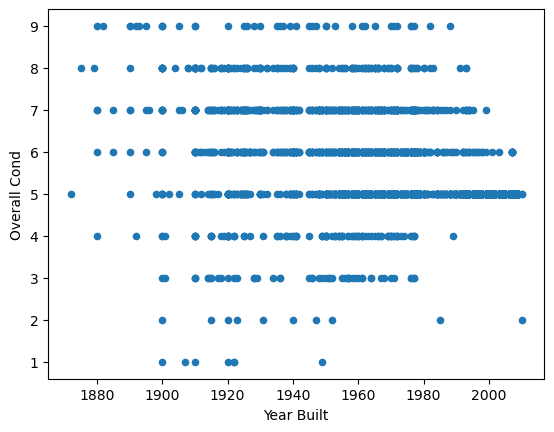

In [27]:
# Plot a scatter plot of 'Year Built' vs. 'Overall Cond' to visualize the relationship between the two variables
(housing
 .plot                                       # Access the plotting methods available for the DataFrame
 .scatter(x='Year Built', y='Overall Cond')  # Create a scatter plot with 'Year Built' on the x-axis and 'Overall Cond' on the y-axis
);

In [28]:
# Calculate the Spearman correlation between 'Year Built' and 'Overall Cond' to measure the strength and direction of their monotonic relationship
housing['Year Built'].corr(housing['Overall Cond'], method='spearman')

-0.42230619262743263

Meaning as one value goes up, the other value goes down slightly.

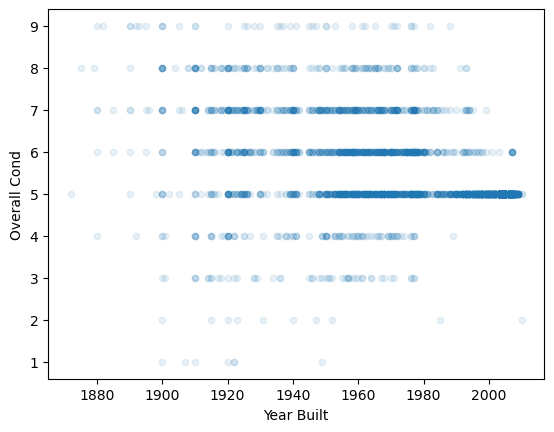

In [30]:
# Plot a scatter plot of 'Year Built' vs. 'Overall Cond' with low opacity to visualize the relationship with less overlap in dense areas
(housing
 .plot                                                  # Access the plotting methods available for the DataFrame
 .scatter(x='Year Built', y='Overall Cond', alpha=.1)   # Create a scatter plot with 'Year Built' on the x-axis 
);                                                      # and 'Overall Cond' on the y-axis, setting the points' opacity to 0.1

What is jittering? Jittering is shifting those values up by a random amount. I'm taking my housing Dataframe and I'm overriding the overall condition column by taking the value of the overall condition and using NumPy to randomly add a value between zero and 0.8. And then I'm subtracting 0.4 to that, so I'm centering that. So this should give us a value between -0.4 and 0.4 on the positive side, but random. Now I'm going to plot this new overall condition. 

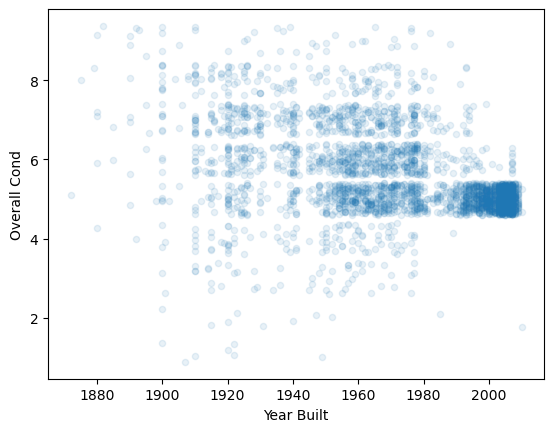

In [32]:
import numpy as np

# Plot a scatter plot of 'Year Built' vs. 'Overall Cond' with jitter added to the y-values to reduce overlap
(housing                                               # Add jitter to 'Overall Cond' to reduce overlap by adding random noise between -0.4 and 0.4
 .assign(**{'Overall Cond': housing['Overall Cond'] + np.random.random(len(housing)) * .8 - .4})
 .plot                                                 # Access the plotting methods available for the DataFrame
 .scatter(x='Year Built', y='Overall Cond', alpha=.1)  # Create a scatter plot with 'Year Built' and the jittered 'Overall Cond', with low opacity
);

You might ask why did I choose the value of 0.8 and 0.4? Well, if you look at the overall condition the overall condition is a whole numeric value, and I kind of want to see some segmentation between the five values and the six values. So if I would put that value instead of 0.8, put it up to one, then it would stretch all the way between one value and the next. So that leaves a little bit of breathing room between those, and then I subtract four so that it's centered at the value.

Now, if you look at this, I think this tells a completely different story than what we're seeing above. This is telling me that we have a lot of values around the year 2000 in the condition five. Again, let's scroll back up to our original scatter plot and I don't know that you would've been able to tell that from looking at the original scatter plot, but by using some of these tricks such as adjusting the alpha and jittering, we are able to have some pretty big insight into what's going on here. This also helps us understand that correlation number that we looked at before. It looks like if you go from the left to the right the values are going slightly down, and that's easier to see after we've applied some of these tricks to our plot. 

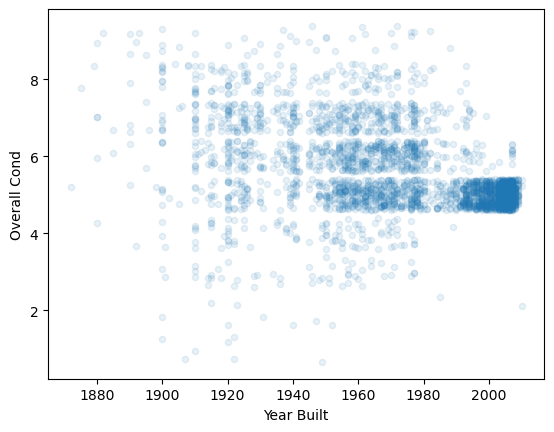

In [34]:
# Define a function to add jitter to a specified column

def jitter(df_, col, amount=.5):
    return (df_[col] + np.random.random(len(df_)) * amount - (amount / 2))  # Add random noise scaled by 'amount', centered around 0


# Apply the jitter function to the 'Overall Cond' column and plot a scatter plot of 'Year Built' vs. 'Overall Cond' with jitter
(housing
 .assign(**{'Overall Cond': jitter(housing, 'Overall Cond', amount=.8)})  # Apply jitter with an amount of 0.8 to the 'Overall Cond' column
 .plot
 .scatter(x='Year Built', y='Overall Cond', alpha=.1) # Create a scatter plot with 'Year Built' on the x-axis and jittered 'Overall Cond' on the y-axis,
);                                                    #  with low opacity

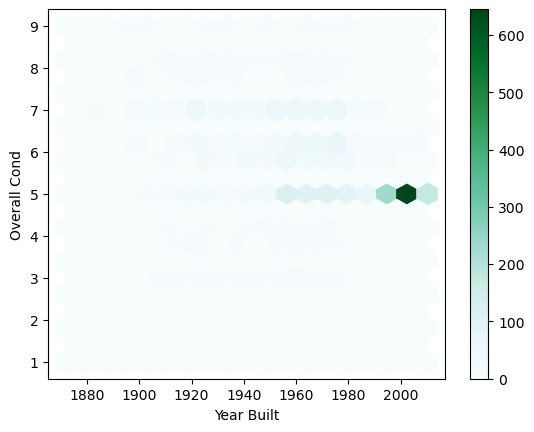

In [35]:
# Plot a hexbin plot of 'Year Built' vs. 'Overall Cond' to visualize the density of data points
(housing
 #.assign(**{'Overall Cond': housing['Overall Cond'] + np.random.random(len(housing))*.8 -.4})
 .plot
 .hexbin(x='Year Built', y='Overall Cond', alpha=1, gridsize=18)  # Create a hexbin plot with hexagon grid size 18 and full opacity
);

### 02_06 - Visualizing Categoricals and Numerical Values

Goals:

* Create a box plot of a single column
* Create a box plot of multiple columns
* Use the `.pivot` method
* Use Seaborn to create other distibution plots by category

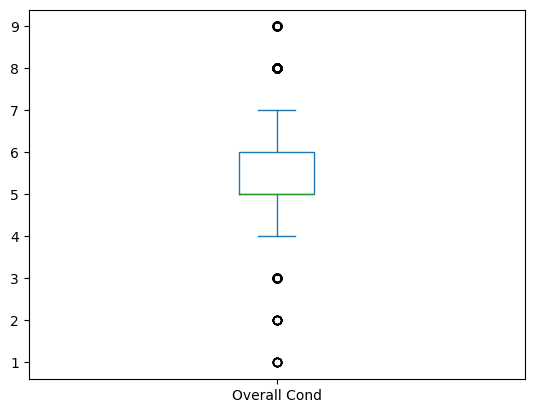

In [37]:
# Create a box plot to compare the distribution of 'Overall Cond' across different 'Year Built' categories
(housing
 #.assign(**{'Overall Cond': housing['Overall Cond'] + np.random.random(len(housing))*.8 -.4})
 .plot                                   # Access the plotting methods available for the DataFrame
 .box(x='Year Built', y='Overall Cond')  # Create a box plot with 'Year Built' on the x-axis and 'Overall Cond' on the y-axis
);

In [38]:
# Create multiple box plots for 'Overall Cond' across different 'Year Built' categories
(housing
 .pivot(columns='Year Built', values='Overall Cond')          # Pivot the DataFrame to have 'Year Built' as columns and 'Overall Cond' as values
# .apply(lambda ser: ser[~ser.isna()].reset_index(drop=True))  # Remove NaN values and reset the index for each series
# .plot.box()                                                  # Create box plots for each 'Year Built' category
)

Year Built,1872,1875,1879,1880,1882,1885,1890,1892,1893,1895,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2926,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2927,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2928,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


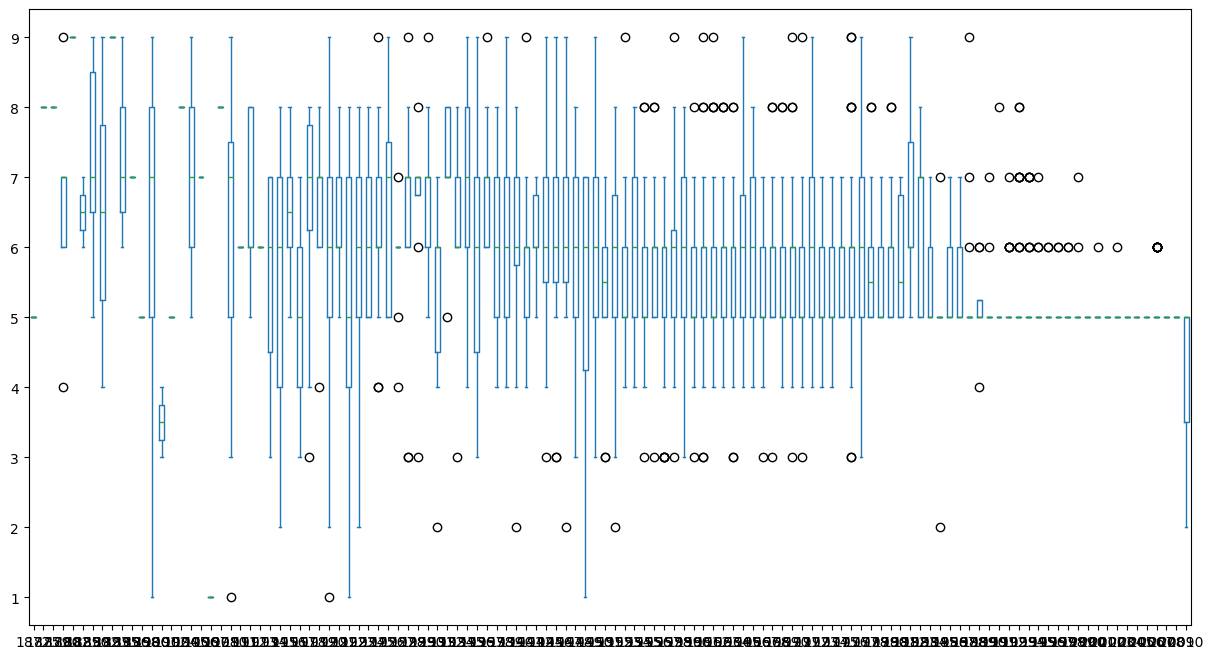

In [39]:
# Create multiple box plots for 'Overall Cond' across different 'Year Built' categories with a larger plot size
(housing
 .pivot(columns='Year Built', values='Overall Cond')          # Pivot the DataFrame to have 'Year Built' as columns and 'Overall Cond' as values
 .apply(lambda ser: ser[~ser.isna()].reset_index(drop=True))  # Remove NaN values and reset the index for each series
 .plot.box(figsize=(15, 8))                                   # Create box plots with a larger figure size (15x8)
);

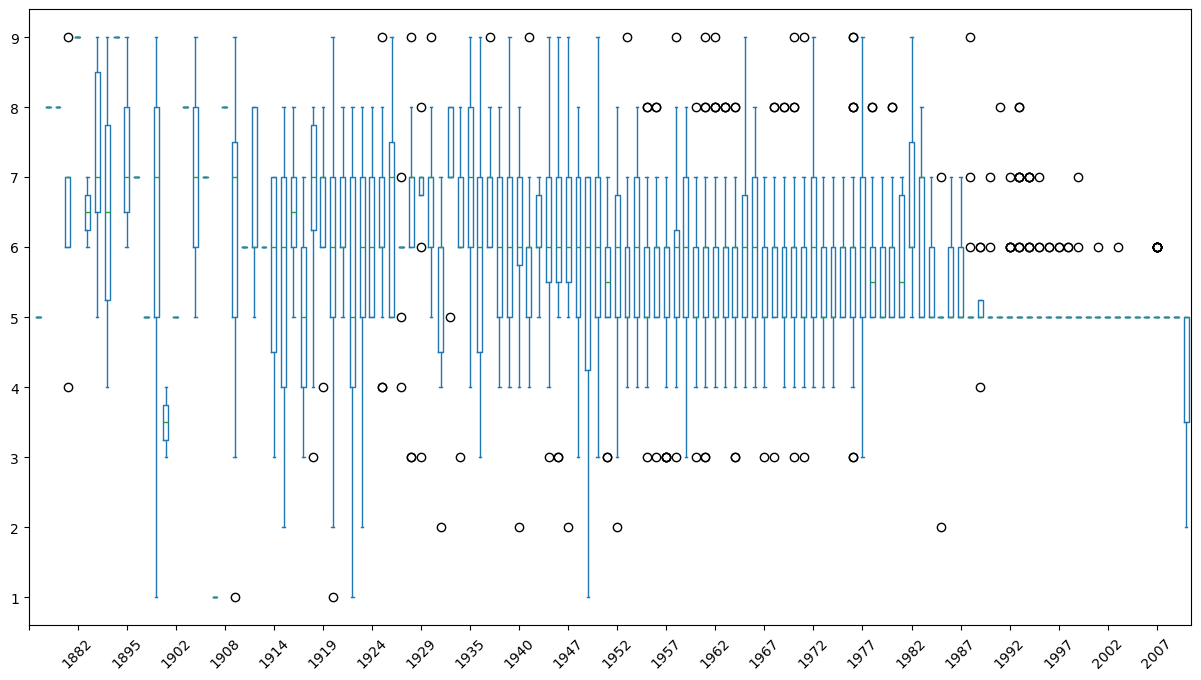

In [40]:
import matplotlib.pyplot as plt

# Create multiple box plots for 'Overall Cond' across different 'Year Built' categories with a larger plot size
fig, ax = plt.subplots(figsize=(15, 8))                       # Set up the figure and axis with a larger size
(housing
 .pivot(columns='Year Built', values='Overall Cond')          # Pivot the DataFrame to have 'Year Built' as columns and 'Overall Cond' as values
 .apply(lambda ser: ser[~ser.isna()].reset_index(drop=True))  # Remove NaN values and reset the index for each series
 .plot.box(ax=ax)                                             # Create box plots on the specified axis
);

# Reduce the number of x-axis labels
plt.xticks(ticks=range(0, len(housing['Year Built'].unique()), 5), rotation=45)  # Show every 5th label, rotated for better readability
plt.show()

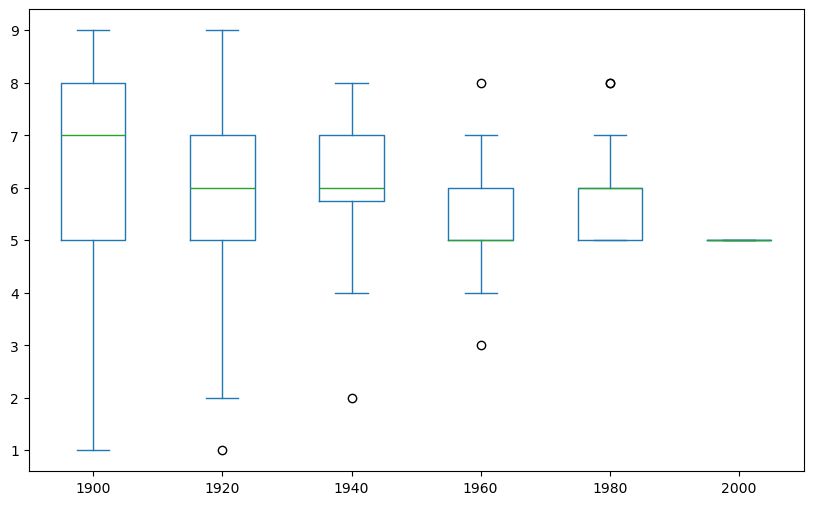

In [41]:
# Create multiple box plots for 'Overall Cond' across selected 'Year Built' categories
(housing
 .pivot(columns='Year Built', values='Overall Cond')          # Pivot the DataFrame to have 'Year Built' as columns and 'Overall Cond' as values
 .apply(lambda ser: ser[~ser.isna()].reset_index(drop=True))  # Remove NaN values and reset the index for each series
 .loc[:, [1900, 1920, 1940, 1960, 1980, 2000]]                # Select specific years for the x-axis
 .plot.box(figsize=(10, 6))                                   # Create box plots with a specified figure size
);

In [42]:
1993 // 10

199

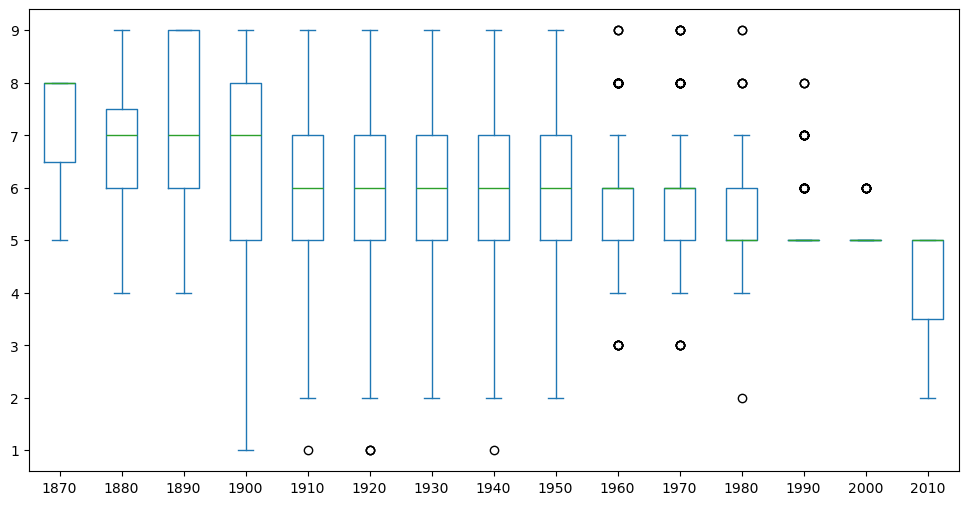

In [43]:
# Group by decade, then create multiple box plots for 'Overall Cond' across these decades
(housing
 .assign(decade=(housing['Year Built'] // 10) * 10)           # Create a new 'decade' column by grouping 'Year Built' into decades
 .pivot(columns='decade', values='Overall Cond')              # Pivot the DataFrame to have 'decade' as columns and 'Overall Cond' as values
 .apply(lambda ser: ser[~ser.isna()].reset_index(drop=True))  # Remove NaN values and reset the index for each series
 .plot.box(figsize=(12, 6))                                   # Create box plots with a specified figure size
);

<Axes: xlabel='Year Built', ylabel='Overall Cond'>

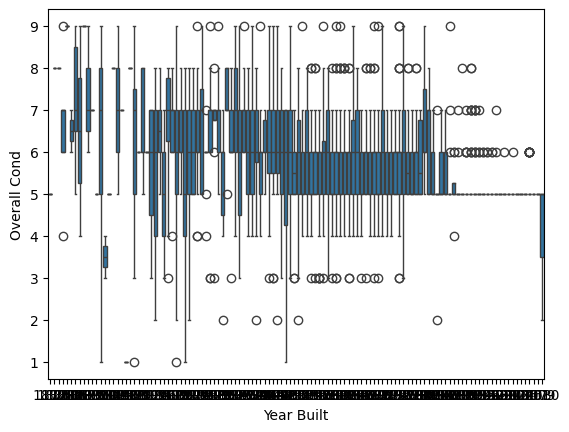

In [44]:
import seaborn as sns

# Create a box plot using Seaborn to visualize the distribution of 'Overall Cond' across different 'Year Built' values
sns.boxplot(data=housing, x='Year Built', y='Overall Cond')  # Generate a box plot with 'Year Built' on the x-axis and 'Overall Cond' on the y-axis


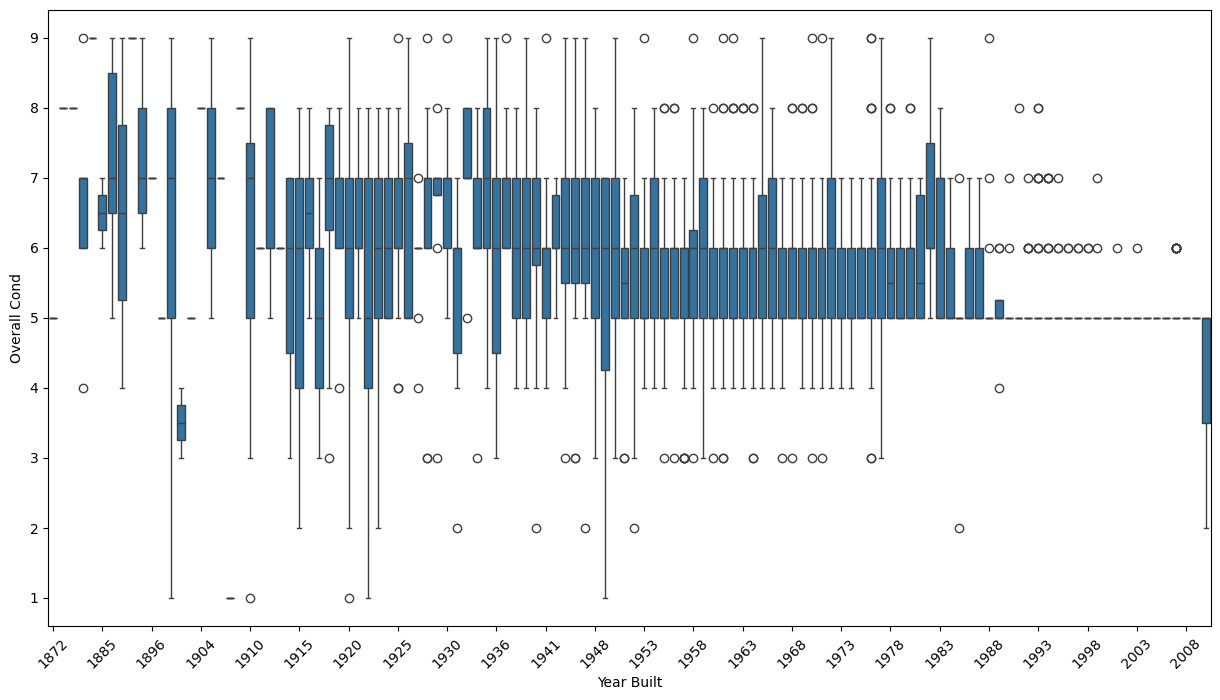

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size to make the plot bigger
plt.figure(figsize=(15, 8))

# Create the box plot with Seaborn
sns.boxplot(data=housing, x='Year Built', y='Overall Cond')

# Customize the x-axis ticks to show every 5th label
plt.xticks(ticks=range(0, len(housing['Year Built'].unique()), 5), rotation=45)

# Display the plot
plt.show()

In [46]:
#sns.boxplot?

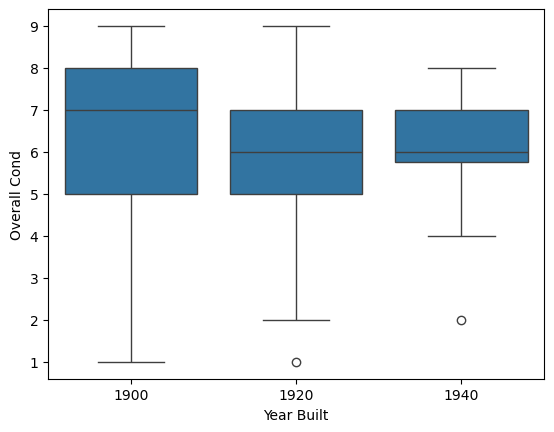

In [47]:
sns.boxplot(data=housing, x='Year Built', y='Overall Cond',
            order=[1900, 1920, 1940]
);

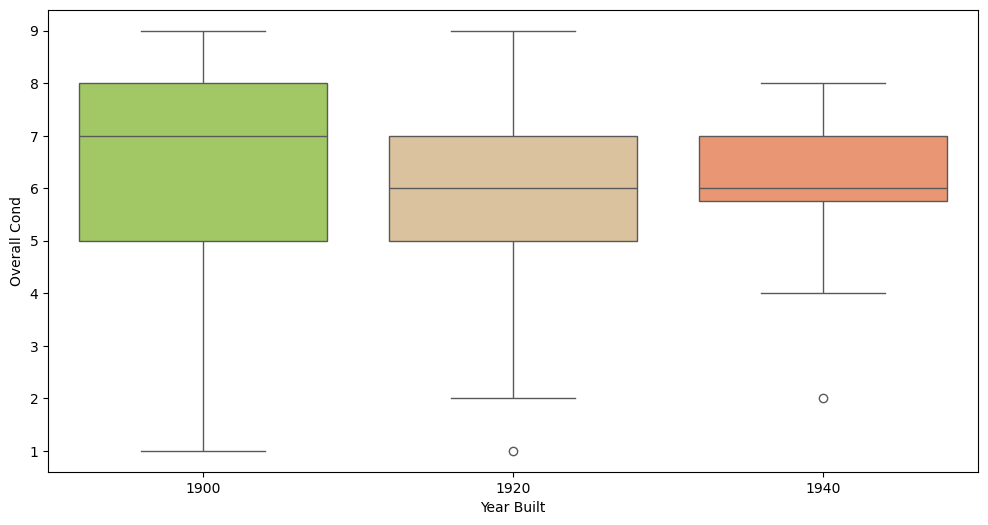

In [48]:
# Convert 'Year Built' to a standard integer type
housing['Year Built'] = housing['Year Built'].astype(int)

# Set the figure size
plt.figure(figsize=(12, 6))

# Create the box plot with the x variable as the hue
sns.boxplot(data=housing, x='Year Built', y='Overall Cond',
            hue='Year Built',                       # Use 'Year Built' as the hue to apply the palette correctly
            order=[1900, 1920, 1940],               # Specify the order of the years
            palette='Set2',                         # Use the 'Set2' color palette
            dodge=False                             # Prevent separating the boxes by hue
);

# Hide the legend since it would be redundant
plt.legend([],[], frameon=False)

# Display the plot
plt.show()

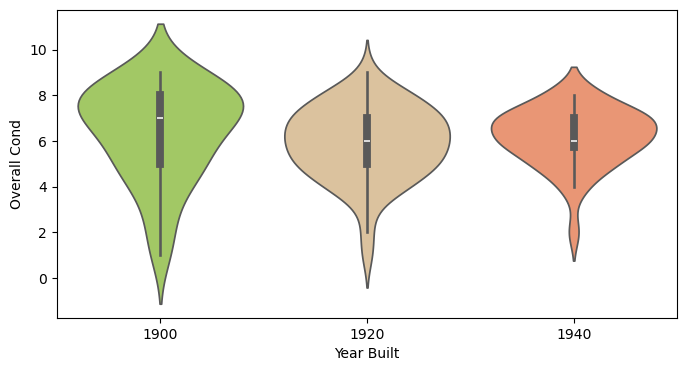

In [49]:
# Set the figure size
plt.figure(figsize=(8, 4))

# Create the box plot with the x variable as the hue
sns.violinplot(data=housing, x='Year Built', y='Overall Cond',
            hue='Year Built',                       # Use 'Year Built' as the hue to apply the palette correctly
            order=[1900, 1920, 1940],               # Specify the order of the years
            palette='Set2',                         # Use the 'Set2' color palette
            dodge=False                             # Prevent separating the boxes by hue
);

# Hide the legend since it would be redundant
plt.legend([],[], frameon=False)

# Display the plot
plt.show()

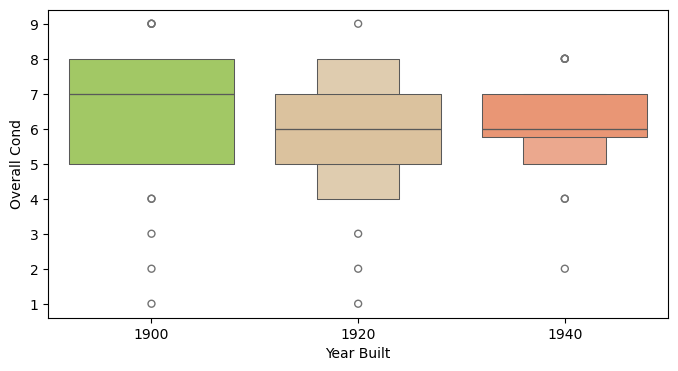

In [50]:
# Set the figure size
plt.figure(figsize=(8, 4))

# Create the box plot with the x variable as the hue
sns.boxenplot(data=housing, x='Year Built', y='Overall Cond',
            hue='Year Built',                       # Use 'Year Built' as the hue to apply the palette correctly
            order=[1900, 1920, 1940],               # Specify the order of the years
            palette='Set2',                         # Use the 'Set2' color palette
            dodge=False                             # Prevent separating the boxes by hue
);

# Hide the legend since it would be redundant
plt.legend([],[], frameon=False)

# Display the plot
plt.show()

### 02_07 - Comparing Two Categoricals

Goals:


* Create a cross-tabulation 
* Style the cross-tabulation table 
* Explore the documentation of the `.background_gradient` method of pandas styling.
* Create a stacked bar plot of a cross-tabulation

In [52]:
# 2 Categoricals
housing.dtypes[:40]

Order             uint16[pyarrow]
PID               uint32[pyarrow]
MS SubClass        uint8[pyarrow]
MS Zoning                category
Lot Frontage      uint16[pyarrow]
Lot Area          uint32[pyarrow]
Street                   category
Alley                    category
Lot Shape                category
Land Contour             category
Utilities                category
Lot Config               category
Land Slope               category
Neighborhood             category
Condition 1              category
Condition 2              category
Bldg Type                category
House Style              category
Overall Qual       uint8[pyarrow]
Overall Cond       uint8[pyarrow]
Year Built                  int32
Year Remod/Add    uint16[pyarrow]
Roof Style               category
Roof Matl                category
Exterior 1st             category
Exterior 2nd             category
Mas Vnr Type             category
Mas Vnr Area      uint16[pyarrow]
Exter Qual               category
Exter Cond    

In [53]:
# Perform a cross-tabulation of 'Overall Qual' and 'Bsmt Cond' with observed=False to retain all combinations
(housing
 .groupby(['Overall Qual', 'Bsmt Cond'], observed=False)  # Group by 'Overall Qual' and 'Bsmt Cond', retaining all possible combinations
 .size()                                                  # Count the occurrences of each combination
# .unstack()                                               # Unstack the result to create a cross-tabulation with 'Bsmt Cond' as columns
)

Overall Qual  Bsmt Cond
1             Ex             0
              Fa             0
              Gd             0
              Po             1
              TA             0
2             Ex             0
              Fa             4
              Gd             0
              Po             0
              TA             5
3             Ex             0
              Fa             9
              Gd             0
              Po             0
              TA            21
4             Ex             0
              Fa            16
              Gd             2
              Po             1
              TA           182
5             Ex             1
              Fa            39
              Gd            24
              Po             2
              TA           727
6             Ex             1
              Fa            28
              Gd            28
              Po             0
              TA           672
7             Ex             0
              F

In [54]:
# Perform a cross-tabulation of 'Overall Qual' and 'Bsmt Cond' with observed=False to retain all combinations
(housing
 .groupby(['Overall Qual', 'Bsmt Cond'], observed=False)  # Group by 'Overall Qual' and 'Bsmt Cond', retaining all possible combinations
 .size()                                                  # Count the occurrences of each combination
 .unstack()                                               # Unstack the result to create a cross-tabulation with 'Bsmt Cond' as columns
)

Bsmt Cond,Ex,Fa,Gd,Po,TA
Overall Qual,,,,,
1,0,0,0,1,0
2,0,4,0,0,5
3,0,9,0,0,21
4,0,16,2,1,182
5,1,39,24,2,727
6,1,28,28,0,672
7,0,5,33,0,561
8,1,3,25,1,320
9,0,0,9,0,98


Because this is a common operation, Pandas actually gives this to us for free with the crosstab function. We can call crosstab and say in the index I want the Overall Quality column and in the columns I want the Basement Condition column.

In [56]:
# Create a cross-tabulation between 'Overall Qual' and 'Bsmt Cond'
(pd.crosstab(index=housing['Overall Qual'], columns=housing['Bsmt Cond']))

Bsmt Cond,Ex,Fa,Gd,Po,TA
Overall Qual,,,,,
1,0,0,0,1,0
2,0,4,0,0,5
3,0,9,0,0,21
4,0,16,2,1,182
5,1,39,24,2,727
6,1,28,28,0,672
7,0,5,33,0,561
8,1,3,25,1,320
9,0,0,9,0,98


In [57]:
# Create a cross-tabulation between 'Overall Qual' and 'Bsmt Cond' with a background gradient applied
(pd.crosstab(index=housing['Overall Qual'], columns=housing['Bsmt Cond'])  # Overall Qual' as rows and 'Bsmt Cond' as columns
 .style                                                                    # Use the Styler object to apply formatting to the DataFrame
 .background_gradient(cmap='viridis', axis=None)     # Apply a background gradient using the 'viridis' colormap across the entire DataFrame
)

Bsmt Cond,Ex,Fa,Gd,Po,TA
Overall Qual,,,,,
1,0,0,0,1,0
2,0,4,0,0,5
3,0,9,0,0,21
4,0,16,2,1,182
5,1,39,24,2,727
6,1,28,28,0,672
7,0,5,33,0,561
8,1,3,25,1,320
9,0,0,9,0,98


In [58]:
#raw.style.background_gradient?

In [59]:
# Create a cross-tabulation and reorder columns, selecting only the ones that exist
crosstab = pd.crosstab(index=housing['Overall Qual'], columns=housing['Bsmt Cond'])

# Filter the columns based on existing ones in the crosstab
existing_columns = [col for col in ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'Missing', 'NA'] if col in crosstab.columns]

# Apply the filtering and formatting
(crosstab
 .loc[:, existing_columns]                        # Select and reorder only the existing columns
 .style                                           # Use the Styler object to apply formatting to the DataFrame
 .background_gradient(cmap='viridis', axis=None)  # Apply a background gradient across the entire DataFrame
)

Bsmt Cond,Ex,Gd,TA,Fa,Po
Overall Qual,,,,,
1,0,0,0,0,1
2,0,0,5,4,0
3,0,0,21,9,0
4,0,2,182,16,1
5,1,24,727,39,2
6,1,28,672,28,0
7,0,33,561,5,0
8,1,25,320,3,1
9,0,9,98,0,0


In [60]:
# Reorder the columns of the cross-tabulation, including only the ones that exist
(pd.crosstab(index=housing['Overall Qual'], columns=housing['Bsmt Cond'])         # Create the cross-tabulation
 .reindex(columns=['Ex', 'Gd', 'TA', 'Fa', 'Po', 'Missing', 'NA'], fill_value=0)  # Reorder and fill missing columns with 0
 .style                                                                           # Apply the Styler object to enable formatting options
 .background_gradient(cmap='viridis', axis=None)  # Apply a background gradient to the entire DataFrame using the 'viridis' colormap
)

Bsmt Cond,Ex,Gd,TA,Fa,Po,Missing,NA
Overall Qual,,,,,,,
1,0,0,0,0,1,0,0
2,0,0,5,4,0,0,0
3,0,0,21,9,0,0,0
4,0,2,182,16,1,0,0
5,1,24,727,39,2,0,0
6,1,28,672,28,0,0,0
7,0,33,561,5,0,0,0
8,1,25,320,3,1,0,0
9,0,9,98,0,0,0,0


<Axes: xlabel='Overall Qual'>

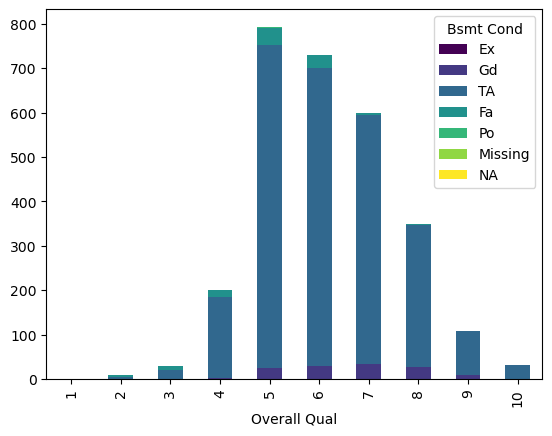

In [61]:
# Reorder the columns and create a stacked bar plot, including only the columns that exist
(pd.crosstab(index=housing['Overall Qual'], columns=housing['Bsmt Cond'])         # Create the cross-tabulation
 .reindex(columns=['Ex', 'Gd', 'TA', 'Fa', 'Po', 'Missing', 'NA'], fill_value=0)  # Reorder columns, filling missing ones with 0
 .plot.bar(stacked=True, cmap='viridis')                                          # Create a stacked bar plot with the 'viridis' colormap
)

### 02_08 - Challenge: Explore Ames
* Create a scatter plot of *1st Flr SF* against *SalePrice*

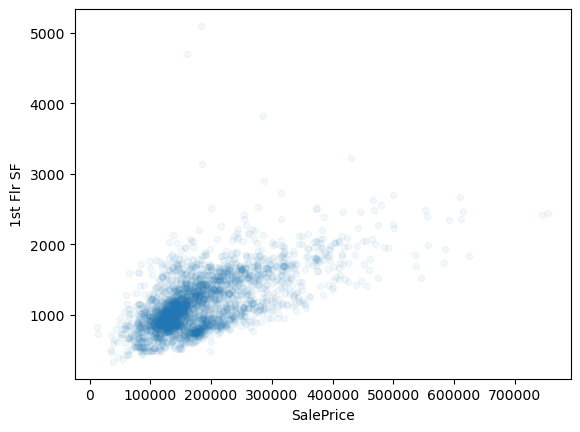

In [63]:
# Create a larger scatter plot with black edge contours
(housing
 .plot.scatter(x='SalePrice', y='1st Flr SF', alpha=.05)  # Create the scatter plot
);